# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계3 : Text classification

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * Machine Learning
>> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
> * Deep Learning
>> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
>> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
>> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)
>> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)

## 1. 개발 환경 설정

### 1-1. 라이브러리 설치

In [ ]:
# # 필요 라이브러리부터 설치할께요.
# !pip install konlpy pandas seaborn wordcloud python-mecab-ko wget transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.9/573.9 kB 39.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 104.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=7779440c478cd1bc5537255912a1c2c5cfb70a1de669cad633aba5fd1741a01e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae

### 1-2. 라이브러리 import

In [ ]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget,os
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import wget,os
from bs4 import BeautifulSoup
import re
from konlpy.tag import Okt
from collections import Counter

In [ ]:
# # 런타임 재시작 필요
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,624 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120876 files and dire

### 1-3. 한글 글꼴 설정

In [ ]:
# !sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. 전처리한 데이터 불러오기
* 1, 2일차에 전처리한 데이터를 불러옵니다.
* sparse data에 대해서는 scipy.sparse.load_npz 활용

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/dd/mini 4 text/2023.10.16_미니프로젝트4차_실습자료/train.csv')
train

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2
...,...,...
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",코드2
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,시스템 운영
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,이론
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,원격


In [ ]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

train['label'] = train['label'].map(label_dict)

0    1585
1     732
2     728
3     561
4     100
Name: label, dtype: int64


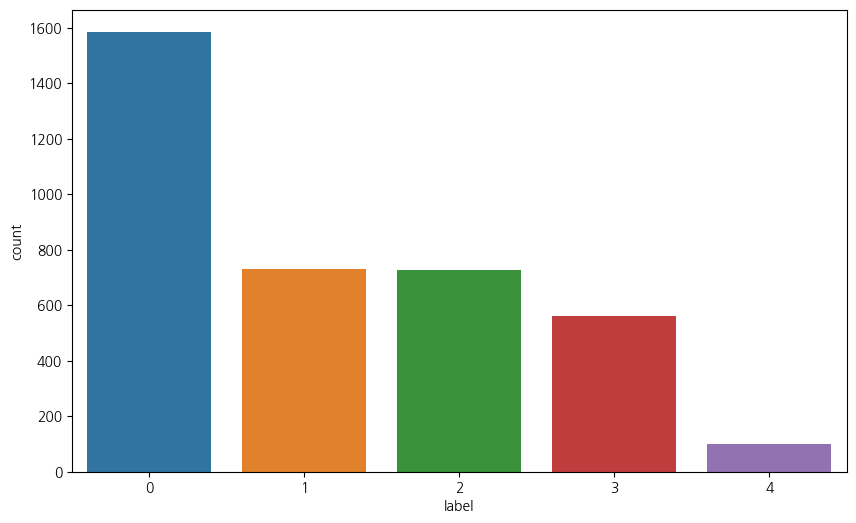

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=train, x='label');

print(train['label'].value_counts())

In [ ]:
okt = Okt()
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
en_stopwords = stopwords.words('english')
use_tag = ['Adjective', 'Noun', 'Number', 'Verb', 'Alpha', 'Foreign']

train['text'] = train['text'].map(lambda x : x.replace('\n', ''))
train['text'] = train['text'].map(lambda x : re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", " ", x))
train['text'] = train['text'].map(lambda x : re.sub('\s+',' ',x))
train['text'] = train['text'].map(lambda x : ' '.join([i[0] for i in okt.pos(x,stem=True) if i[1] in use_tag and i[0] not in en_stopwords]))

In [ ]:
temp = [i.split() for i in train['text'].values]
temp = sum(temp, [])
count = Counter(temp)
count.most_common(20)

[('하다', 7256),
 ('1', 2413),
 ('있다', 1918),
 ('2', 1874),
 ('되다', 1849),
 ('0', 1440),
 ('3', 1007),
 ('것', 998),
 ('x', 864),
 ('수', 836),
 ('어떻다', 829),
 ('값', 814),
 ('데이터', 775),
 ('드리다', 768),
 ('를', 740),
 ('때', 740),
 ('같다', 735),
 ('이', 703),
 ('코드', 703),
 ('나오다', 691)]

In [ ]:
# train['text'] = train['text'].map(lambda x : re.sub('\\b\\d\\b', '', x))
# train['text'] = train['text'].map(lambda x : re.sub('\s+',' ',x))

In [ ]:
# temp = [i.split() for i in train['text'].values]
# temp = sum(temp, [])
# count = Counter(temp)
# count.most_common(20)

[('하다', 7256),
 ('있다', 1918),
 ('되다', 1849),
 ('것', 998),
 ('x', 864),
 ('수', 836),
 ('어떻다', 829),
 ('값', 814),
 ('데이터', 775),
 ('드리다', 768),
 ('를', 740),
 ('때', 740),
 ('같다', 735),
 ('이', 703),
 ('코드', 703),
 ('나오다', 691),
 ('않다', 689),
 ('문제', 664),
 ('요', 658),
 ('print', 618)]

In [ ]:
from sklearn.model_selection import train_test_split

Train, valid = train_test_split(train, shuffle=True, random_state=42, stratify=train['label'], test_size = 0.3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vect_c = CountVectorizer()
vect_t = TfidfVectorizer()
vect_c.fit(train['text'])
vect_t.fit(train['text'])

countvec_train = vect_c.transform(Train['text']).toarray()
countvec_valid = vect_c.transform(valid['text']).toarray()

tfidfvec_train = vect_t.transform(Train['text']).toarray()
tfidfvec_valid = vect_t.transform(valid['text']).toarray()

y_train = Train['label']
y_valid = valid['label']

In [ ]:
print(countvec_train.shape, countvec_valid.shape, tfidfvec_train.shape , tfidfvec_valid.shape)

(2594, 8903) (1112, 8903) (2594, 8903) (1112, 8903)


## 3. Machine Learning(N-grams)
* N-gram으로 전처리한 데이터를 이용하여 3개 이상의 Machine Learning 모델 학습 및 성능 분석
> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

In [ ]:
rs = 42

### 3-1. Model 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc

clf_1_count = rfc(random_state=42, n_estimators = 500)
clf_1_tf = rfc(random_state=42, n_estimators = 500)
clf_1_count.fit(countvec_train, y_train)
clf_1_tf.fit(tfidfvec_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

pred_c = clf_1_count.predict(countvec_valid)
pred_t = clf_1_tf.predict(tfidfvec_valid)
names = ['코드', '웹', '이론', '시스템 운영', '원격']
# print('f1', f1_score(y_valid, pred, average='weighted'))
print(classification_report(y_valid, pred_c, target_names=names))
print('-'*100)
print(classification_report(y_valid, pred_t, target_names=names))

              precision    recall  f1-score   support

          코드       0.72      0.92      0.81       476
           웹       0.90      0.65      0.75       220
          이론       0.74      0.56      0.64       218
      시스템 운영       0.81      0.76      0.79       168
          원격       0.96      0.73      0.83        30

    accuracy                           0.77      1112
   macro avg       0.83      0.73      0.76      1112
weighted avg       0.78      0.77      0.76      1112

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

          코드       0.70      0.92      0.80       476
           웹       0.88      0.58      0.70       220
          이론       0.73      0.58      0.64       218
      시스템 운영       0.81      0.73      0.77       168
          원격       1.00      0.67      0.80        30

    accuracy                           0.75      1112
   macro avg       0.82      0

### 3-2. Model 2

In [ ]:
from sklearn.linear_model import LogisticRegression as clf

clf_count = clf(random_state=42, max_iter = 10000)
clf_tf = clf(random_state=42, max_iter = 10000)
clf_count.fit(countvec_train, y_train)
clf_tf.fit(tfidfvec_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

pred_c = clf_count.predict(countvec_valid)
pred_t = clf_tf.predict(tfidfvec_valid)
names = ['코드', '웹', '이론', '시스템 운영', '원격']
# print('f1', f1_score(y_valid, pred, average='weighted'))
print(classification_report(y_valid, pred_c, target_names=names))
print('-'*100)
print(classification_report(y_valid, pred_t, target_names=names))

              precision    recall  f1-score   support

          코드       0.82      0.85      0.83       476
           웹       0.85      0.79      0.82       220
          이론       0.67      0.67      0.67       218
      시스템 운영       0.82      0.82      0.82       168
          원격       1.00      0.80      0.89        30

    accuracy                           0.80      1112
   macro avg       0.83      0.79      0.81      1112
weighted avg       0.80      0.80      0.80      1112

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

          코드       0.76      0.92      0.83       476
           웹       0.89      0.74      0.81       220
          이론       0.75      0.67      0.70       218
      시스템 운영       0.87      0.73      0.79       168
          원격       1.00      0.47      0.64        30

    accuracy                           0.79      1112
   macro avg       0.85      0

### 3-3. Model 3

In [ ]:
import tensorflow as tf

x = tf.keras.layers.Input(shape=(8903))
h = tf.keras.layers.Dense(32, activation='relu')(x)
h = tf.keras.layers.Dense(32, activation='relu')(h)
h = tf.keras.layers.Dropout(0.7)(h)
y = tf.keras.layers.Dense(5,activation='softmax')(h)
model = tf.keras.models.Model(x,y)
model.summary()

model.compile(optimizer='Rmsprop', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(countvec_train,y_train, epochs=30, validation_data=(countvec_valid, y_valid))

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 8903)]            0         
                                                                 
 dense_82 (Dense)            (None, 32)                284928    
                                                                 
 dense_83 (Dense)            (None, 32)                1056      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_84 (Dense)            (None, 5)                 165       
                                                                 
Total params: 286149 (1.09 MB)
Trainable params: 286149 (1.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
82/82 [====

In [ ]:
y_pred = model.predict(countvec_valid)
y_pred = np.argmax(y_pred, axis = 1)

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


names = ['코드', '웹', '이론', '시스템 운영', '원격']

print(classification_report(y_valid, y_pred, target_names=names))

35/35 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

          코드       0.84      0.86      0.85       476
           웹       0.84      0.85      0.85       220
          이론       0.70      0.70      0.70       218
      시스템 운영       0.84      0.84      0.84       168
          원격       1.00      0.60      0.75        30

    accuracy                           0.82      1112
   macro avg       0.85      0.77      0.80      1112
weighted avg       0.82      0.82      0.82      1112



In [ ]:
import tensorflow as tf

x = tf.keras.layers.Input(shape=(8903))
h = tf.keras.layers.Dense(32, activation='relu')(x)
h = tf.keras.layers.Dense(32, activation='relu')(h)
# h = tf.keras.layers.Dropout(0.5)(h)
y = tf.keras.layers.Dense(5,activation='softmax')(h)
model = tf.keras.models.Model(x,y)
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(tfidfvec_train,y_train, epochs=20)

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 8903)]            0         
                                                                 
 dense_46 (Dense)            (None, 32)                284928    
                                                                 
 dense_47 (Dense)            (None, 32)                1056      
                                                                 
 dense_48 (Dense)            (None, 5)                 165       
                                                                 
Total params: 286149 (1.09 MB)
Trainable params: 286149 (1.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
82/82 [==============================] - 2s 16ms/step - loss: 1.4248 - accuracy: 0.4190
Epoch 2/20
82/82 [==============================] - 1s 

In [ ]:
y_pred = model.predict(countvec_valid)
y_pred = np.argmax(y_pred, axis = 1)

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


names = ['코드', '웹', '이론', '시스템 운영', '원격']

print(classification_report(y_valid, y_pred, target_names=names))

35/35 [==============================] - 1s 31ms/step
              precision    recall  f1-score   support

          코드       0.83      0.88      0.85       476
           웹       0.90      0.79      0.84       220
          이론       0.71      0.73      0.72       218
      시스템 운영       0.82      0.81      0.82       168
          원격       0.88      0.77      0.82        30

    accuracy                           0.82      1112
   macro avg       0.83      0.80      0.81      1112
weighted avg       0.82      0.82      0.82      1112



# 나이브베이즈

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf_count = clf = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
clf_tf = clf = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
clf_count.fit(countvec_train, y_train)
clf_tf.fit(tfidfvec_train, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

pred_c = clf_count.predict(countvec_valid)
pred_t = clf_tf.predict(tfidfvec_valid)
names = ['코드', '웹', '이론', '시스템 운영', '원격']
# print('f1', f1_score(y_valid, pred, average='weighted'))
print(classification_report(y_valid, pred_c, target_names=names))
print('-'*100)
print(classification_report(y_valid, pred_t, target_names=names))

              precision    recall  f1-score   support

          코드       0.89      0.84      0.86       476
           웹       0.90      0.80      0.84       220
          이론       0.65      0.85      0.74       218
      시스템 운영       0.79      0.88      0.83       168
          원격       0.67      0.07      0.12        30

    accuracy                           0.82      1112
   macro avg       0.78      0.69      0.68      1112
weighted avg       0.83      0.82      0.81      1112

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

          코드       0.60      0.99      0.75       476
           웹       0.94      0.53      0.68       220
          이론       0.92      0.39      0.54       218
      시스템 운영       0.93      0.61      0.73       168
          원격       0.00      0.00      0.00        30

    accuracy                           0.70      1112
   macro avg       0.68      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3-4. Hyperparameter Tuning(Optional)
* Manual Search, Grid search, Bayesian Optimization, TPE...
> * [grid search tutorial sklearn](https://scikit-learn.org/stable/modules/grid_search.html)
> * [optuna tutorial](https://optuna.org/#code_examples)
> * [ray-tune tutorial](https://docs.ray.io/en/latest/tune/examples/tune-sklearn.html)

## 4. Deep Learning(Sequence)
* Sequence로 전처리한 데이터를 이용하여 DNN, 1-D CNN, LSTM 등 3가지 이상의 deep learning 모델 학습 및 성능 분석
> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing import text

In [ ]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(train['text'])

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 9318
등장 빈도가 2번 이하인 희귀 단어의 수: 4917
단어 집합에서 희귀 단어의 비율: 52.768834513844176
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.1508990019803536


In [ ]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4402


In [ ]:
tokenizer = text.Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(train['text'])

In [ ]:
text_seq_train = tokenizer.texts_to_sequences(Train['text'])
text_seq_valid = tokenizer.texts_to_sequences(valid['text'])

리뷰의 최대 길이 : 754
리뷰의 평균 길이 : 39.841557440246724


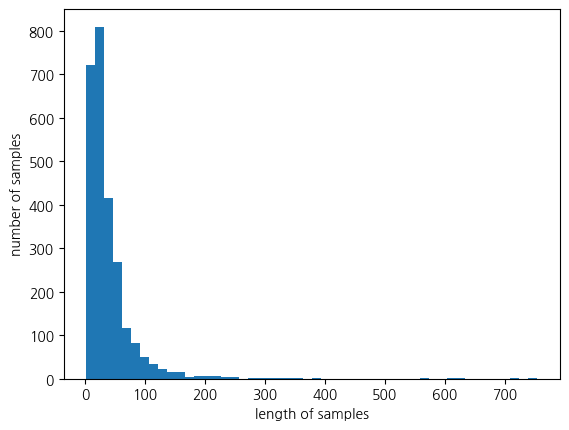

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in text_seq_train))
print('리뷰의 평균 길이 :',sum(map(len, text_seq_train))/len(text_seq_train))
plt.hist([len(review) for review in text_seq_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
for i in [100,200,400,500,600]:
  print(i)
  print(train.loc[train['text'].str.len() >= i,]['label'].to_frame().value_counts())
  print('-'*100)

100
label
0        1046
2         328
1         308
3         127
4          18
dtype: int64
----------------------------------------------------------------------------------------------------
200
label
0        543
1        107
2         94
3         23
4          5
dtype: int64
----------------------------------------------------------------------------------------------------
400
label
0        171
1         25
2          7
3          3
4          1
dtype: int64
----------------------------------------------------------------------------------------------------
500
label
0        108
1         18
2          3
3          1
4          1
dtype: int64
----------------------------------------------------------------------------------------------------
600
label
0        75
1        16
2         1
dtype: int64
----------------------------------------------------------------------------------------------------


In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))


In [ ]:
max_len = 500
below_threshold_len(max_len, text_seq_train)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 99.80724749421742


In [ ]:
text_seq_train = sequence.pad_sequences(text_seq_train, maxlen=max_len)
text_seq_valid = sequence.pad_sequences(text_seq_valid, maxlen=max_len)

In [ ]:
print(text_seq_train.shape)

(2594, 500)


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D
def _get_last_layer_units_and_activation(num_classes):
    """Gets the # units and activation function for the last network layer.

    # Arguments
        num_classes: int, number of classes.

    # Returns
        units, activation values.
    """
    if num_classes == 2:
        activation = 'sigmoid'
        units = 1
    else:
        activation = 'softmax'
        units = num_classes
    return units, activation
def sepcnn_model(blocks,
                 filters,
                 kernel_size,
                 embedding_dim,
                 dropout_rate,
                 pool_size,
                 input_shape,
                 num_classes,
                 num_features,
                 use_pretrained_embedding=False,
                 is_embedding_trainable=False,
                 embedding_matrix=None):
    """Creates an instance of a separable CNN model.

    # Arguments
        blocks: int, number of pairs of sepCNN and pooling blocks in the model.
        filters: int, output dimension of the layers.
        kernel_size: int, length of the convolution window.
        embedding_dim: int, dimension of the embedding vectors.
        dropout_rate: float, percentage of input to drop at Dropout layers.
        pool_size: int, factor by which to downscale input at MaxPooling layer.
        input_shape: tuple, shape of input to the model.
        num_classes: int, number of output classes.
        num_features: int, number of words (embedding input dimension).
        use_pretrained_embedding: bool, true if pre-trained embedding is on.
        is_embedding_trainable: bool, true if embedding layer is trainable.
        embedding_matrix: dict, dictionary with embedding coefficients.

    # Returns
        A sepCNN model instance.
    """
    op_units, op_activation = _get_last_layer_units_and_activation(num_classes)
    model = models.Sequential()

    # Add embedding layer. If pre-trained embedding is used add weights to the
    # embeddings layer and set trainable to input is_embedding_trainable flag.
    if use_pretrained_embedding:
        model.add(Embedding(input_dim=num_features,
                            output_dim=embedding_dim,
                            input_length=input_shape[0],
                            weights=[embedding_matrix],
                            trainable=is_embedding_trainable))
    else:
        model.add(Embedding(input_dim=num_features,
                            output_dim=embedding_dim,
                            input_length=input_shape[0]))

    for _ in range(blocks-1):
        model.add(Dropout(rate=dropout_rate))
        model.add(SeparableConv1D(filters=filters,
                                  kernel_size=kernel_size,
                                  activation='relu',
                                  bias_initializer='random_uniform',
                                  depthwise_initializer='random_uniform',
                                  padding='same'))
        model.add(SeparableConv1D(filters=filters,
                                  kernel_size=kernel_size,
                                  activation='relu',
                                  bias_initializer='random_uniform',
                                  depthwise_initializer='random_uniform',
                                  padding='same'))
        model.add(MaxPooling1D(pool_size=pool_size))

    model.add(SeparableConv1D(filters=filters * 2,
                              kernel_size=kernel_size,
                              activation='relu',
                              bias_initializer='random_uniform',
                              depthwise_initializer='random_uniform',
                              padding='same'))
    model.add(SeparableConv1D(filters=filters * 2,
                              kernel_size=kernel_size,
                              activation='relu',
                              bias_initializer='random_uniform',
                              depthwise_initializer='random_uniform',
                              padding='same'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(op_units, activation=op_activation))
    return model

In [ ]:
model = sepcnn_model(blocks = 2,
            filters=128,
            kernel_size=3,
            embedding_dim=200,
            dropout_rate=0.2,
            pool_size=2,
            input_shape=[500],
            num_classes=5,
            num_features=vocab_size,
            use_pretrained_embedding=False,
            is_embedding_trainable=False,
            embedding_matrix=None)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()
model.fit(text_seq_train,y_train.values, epochs=100, batch_size=64, validation_data=(text_seq_valid, y_valid))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_49 (Embedding)    (None, 500, 200)          880400    
                                                                 
 dropout_50 (Dropout)        (None, 500, 200)          0         
                                                                 
 separable_conv1d_100 (Sepa  (None, 500, 128)          26328     
 rableConv1D)                                                    
                                                                 
 separable_conv1d_101 (Sepa  (None, 500, 128)          16896     
 rableConv1D)                                                    
                                                                 
 max_pooling1d_37 (MaxPooli  (None, 250, 128)          0         
 ng1D)                                                           
                                                     

KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(text_seq_valid)
y_pred = np.argmax(y_pred, axis = 1)

from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report


names = ['코드', '웹', '이론', '시스템 운영', '원격']

print(classification_report(y_valid, y_pred, target_names=names))
print(accuracy_score(y_valid, y_pred))

35/35 [==============================] - 5s 134ms/step
              precision    recall  f1-score   support

          코드       0.82      0.80      0.81       476
           웹       0.45      0.43      0.44       220
          이론       0.40      0.37      0.38       218
      시스템 운영       0.54      0.67      0.60       168
          원격       0.33      0.33      0.33        30

    accuracy                           0.61      1112
   macro avg       0.51      0.52      0.51      1112
weighted avg       0.61      0.61      0.61      1112

0.6106115107913669


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Embedding, SeparableConv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping



# vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 256
input_length = 500
filters = 64
kernel_size = 3
pool_size = 2
dropout_rate = 0.2

il = Input(shape=(input_length,))
hl =  Embedding(vocab_size, embedding_dim, input_length=input_length)(il)
hl = Dropout(dropout_rate)(hl)
hl = SeparableConv1D(filters=filters, kernel_size=kernel_size, activation='relu', bias_initializer='random_uniform', depthwise_initializer='random_uniform', padding='same')(hl)
hl = hl = SeparableConv1D(filters=filters, kernel_size=kernel_size, activation='relu', bias_initializer='random_uniform', depthwise_initializer='random_uniform', padding='same')(hl)
hl = MaxPooling1D(pool_size=pool_size)(hl)

# hl = Dropout(dropout_rate)(hl)
# hl = SeparableConv1D(filters=filters, kernel_size=kernel_size, activation='relu', bias_initializer='random_uniform', depthwise_initializer='random_uniform', padding='same')(hl)
# hl = hl = SeparableConv1D(filters=filters, kernel_size=kernel_size, activation='relu', bias_initializer='random_uniform', depthwise_initializer='random_uniform', padding='same')(hl)
# hl = MaxPooling1D(pool_size=pool_size)(hl)

# hl = Dropout(dropout_rate)(hl)
# hl = SeparableConv1D(filters=filters, kernel_size=kernel_size, activation='relu', bias_initializer='random_uniform', depthwise_initializer='random_uniform', padding='same')(hl)
# hl = hl = SeparableConv1D(filters=filters, kernel_size=kernel_size, activation='relu', bias_initializer='random_uniform', depthwise_initializer='random_uniform', padding='same')(hl)
# hl = MaxPooling1D(pool_size=pool_size)(hl)

# hl = Dropout(dropout_rate)(hl)
# hl = SeparableConv1D(filters=filters, kernel_size=kernel_size, activation='relu', bias_initializer='random_uniform', depthwise_initializer='random_uniform', padding='same')(hl)
# hl = hl = SeparableConv1D(filters=filters, kernel_size=kernel_size, activation='relu', bias_initializer='random_uniform', depthwise_initializer='random_uniform', padding='same')(hl)
# hl = MaxPooling1D(pool_size=pool_size)(hl)

hl = SeparableConv1D(filters=filters*2, kernel_size=kernel_size, activation='relu', bias_initializer='random_uniform', depthwise_initializer='random_uniform', padding='same')(hl)
hl = SeparableConv1D(filters=filters*2, kernel_size=kernel_size, activation='relu', bias_initializer='random_uniform', depthwise_initializer='random_uniform', padding='same')(hl)
hl = GlobalAveragePooling1D()(hl)
hl = Dropout(rate=dropout_rate)(hl)
ol = Dense(5, activation='softmax')(hl)

sepcnn_model = Model(il, ol)
sepcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

sepcnn_model.summary()
sepcnn_model.fit(text_seq_train,y_train.values, epochs=10, batch_size=64, validation_data=(text_seq_valid, y_valid))

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_44 (Embedding)    (None, 500, 256)          1126912   
                                                                 
 dropout_40 (Dropout)        (None, 500, 256)          0         
                                                                 
 separable_conv1d_80 (Separ  (None, 500, 64)           17216     
 ableConv1D)                                                     
                                                                 
 separable_conv1d_81 (Separ  (None, 500, 64)           4352      
 ableConv1D)                                                     
                                                                 
 max_pooling1d_32 (MaxPooli  (None, 250, 64)           0  

In [ ]:
y_pred = sepcnn_model.predict(text_seq_valid)
y_pred = np.argmax(y_pred, axis = 1)

from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report


names = ['코드', '웹', '이론', '시스템 운영', '원격']

print(classification_report(y_valid, y_pred, target_names=names))
print(accuracy_score(y_valid, y_pred))

35/35 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

          코드       0.87      0.89      0.88       476
           웹       0.89      0.84      0.86       220
          이론       0.78      0.76      0.77       218
      시스템 운영       0.85      0.90      0.88       168
          원격       1.00      0.77      0.87        30

    accuracy                           0.85      1112
   macro avg       0.88      0.83      0.85      1112
weighted avg       0.85      0.85      0.85      1112

0.8534172661870504


### 4-1. DNN

In [ ]:
import tensorflow as tf

emb_dim = 256

x = tf.keras.layers.Input(shape=(500))
h = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=emb_dim, input_length=max_len)(x)
# h = tf.keras.layers.Flatten()(h)
h = tf.keras.layers.GlobalMaxPooling1D()(h)
h = tf.keras.layers.Dense(128, activation='relu')(h)
# h = tf.keras.layers.Dropout(0.5)(h)
y = tf.keras.layers.Dense(5,activation='softmax')(h)
model = tf.keras.models.Model(x,y)
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(text_seq_train,y_train.values, epochs=10, batch_size=64, validation_data=(text_seq_valid, y_valid))

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_35 (Embedding)    (None, 500, 256)          1126912   
                                                                 
 global_max_pooling1d_5 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_63 (Dense)            (None, 128)               32896     
                                                                 
 dense_64 (Dense)            (None, 5)                 645       
                                                                 
Total params: 1160453 (4.43 MB)
Trainable params: 1160453 (4.43 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
y_pred = model.predict(text_seq_valid)
y_pred = np.argmax(y_pred, axis = 1)

from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report


names = ['코드', '웹', '이론', '시스템 운영', '원격']

print(classification_report(y_valid, y_pred, target_names=names))

35/35 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

          코드       0.86      0.88      0.87       476
           웹       0.88      0.85      0.86       220
          이론       0.76      0.76      0.76       218
      시스템 운영       0.87      0.90      0.88       168
          원격       1.00      0.77      0.87        30

    accuracy                           0.85      1112
   macro avg       0.87      0.83      0.85      1112
weighted avg       0.85      0.85      0.85      1112



### 4-2. 1-D CNN

In [ ]:
import tensorflow as tf

emb_dim = 256
kernel_size = 5
num_filters = 128

input = tf.keras.layers.Input(shape = (500))
h = tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = emb_dim, input_length=max_len)(input)
h = tf.keras.layers.Conv1D(num_filters, kernel_size, padding='valid', activation='relu')(h)
h = tf.keras.layers.GlobalMaxPooling1D()(h)
h = tf.keras.layers.Dense(64, activation = 'relu')(h)
output = tf.keras.layers.Dense(5, activation = 'softmax')(h)
model = tf.keras.models.Model(input,output)
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(text_seq_train,y_train.values, epochs=20, batch_size=64, validation_data=(text_seq_valid, y_valid))

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_32 (Embedding)    (None, 500, 256)          1126912   
                                                                 
 conv1d_4 (Conv1D)           (None, 496, 128)          163968    
                                                                 
 global_max_pooling1d_4 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 5)                 325       
                                                          

KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(text_seq_valid)
y_pred = np.argmax(y_pred, axis = 1)

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


names = ['코드', '웹', '이론', '시스템 운영', '원격']

print(classification_report(y_valid, y_pred, target_names=names))

35/35 [==============================] - 4s 104ms/step
              precision    recall  f1-score   support

          코드       0.87      0.86      0.87       476
           웹       0.86      0.85      0.85       220
          이론       0.73      0.73      0.73       218
      시스템 운영       0.82      0.88      0.85       168
          원격       1.00      0.80      0.89        30

    accuracy                           0.84      1112
   macro avg       0.86      0.83      0.84      1112
weighted avg       0.84      0.84      0.84      1112



### 4-3. LSTM

In [ ]:
import tensorflow as tf

emb_dim = 256
hidden = 128
kernel_size = 3
num_filters = 128

input = tf.keras.layers.Input(shape = (500))
h = tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = emb_dim, input_length=max_len)(input)
h = tf.keras.layers.LSTM(hidden)(h)
h = tf.keras.layers.Dense(64, activation = 'relu')(h)
output = tf.keras.layers.Dense(5, activation = 'softmax')(h)
model = tf.keras.models.Model(input,output)
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(text_seq_train,y_train.values, epochs=10, batch_size=64, validation_data=(text_seq_valid, y_valid))

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_34 (Embedding)    (None, 500, 256)          1126912   
                                                                 
 lstm_2 (LSTM)               (None, 128)               197120    
                                                                 
 dense_61 (Dense)            (None, 64)                8256      
                                                                 
 dense_62 (Dense)            (None, 5)                 325       
                                                                 
Total params: 1332613 (5.08 MB)
Trainable params: 1332613 (5.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
41/41 [==

KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(text_seq_valid)
y_pred = np.argmax(y_pred, axis = 1)

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


names = ['코드', '웹', '이론', '시스템 운영', '원격']

print(classification_report(y_valid, y_pred, target_names=names))

35/35 [==============================] - 13s 361ms/step
              precision    recall  f1-score   support

          코드       0.87      0.79      0.83       476
           웹       0.79      0.85      0.82       220
          이론       0.67      0.72      0.69       218
      시스템 운영       0.80      0.84      0.82       168
          원격       0.89      0.80      0.84        30

    accuracy                           0.80      1112
   macro avg       0.80      0.80      0.80      1112
weighted avg       0.80      0.80      0.80      1112



## 5. Using pre-trained model(Optional)
* 한국어 pre-trained model로 fine tuning 및 성능 분석
> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)
> * [HuggingFace-Korean](https://huggingface.co/models?language=korean)